## Finding the Genetic Background of our Celllines

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr

In [2]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes

In [3]:
cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

In [4]:
len(cellLines)

769

In [191]:
sorted_tp53 = effect['TP53'].sort_values()
length = len(sorted_tp53)
#sorted_tp53[int(np.round(0.8*len(effect['TP53']))):length]
#pd.concat(sorted_tp53[0:int(np.round(0.2*length))],sorted_tp53[int(np.round(0.8*length)):length])

In [230]:
#MDM2_sorted = effect["MDM2"].sort_values()
#new = MDM2_sorted[0:int(np.round(0.2*len(MDM2_sorted)))]
#new.index.tolist()


def GE_overlap(gene1,gene2,percentage):
    length = len(effect[gene1])
    sort1 = effect[gene1].sort_values()
    new1 = sort1[0:int(np.round(percentage*len(sort1)))]
    
    new2 = sort1[int(np.round((1-percentage)*len(sort1))):length]
    a = new1.index.tolist()
    b = new2.index.tolist()
    a = set(a)
    b = set(b)
    
    sort2 = effect[gene2].sort_values()
    new3 = sort2[0:int(np.round(percentage*len(sort2)))]
    new4 = sort2[int(np.round((1-percentage)*len(sort2))):length]

    c = new3.index.tolist()
    d = new4.index.tolist()
    c = set(c)
    d = set(d)
    
    #gene1 low, gene2 low
    e = set.intersection(a,c)
    #gene1 high, gene2 high
    f = set.intersection(b,d)
    #gene1 low, gene2 high
    g = set.intersection(a,d)
    # gene1 high, gene2 low
    h = set.intersection(b,c)
    #print('HS695T' in c)
    #print('HS695T' in a)

    print(len(e),len(f),len(g),len(h))
    return [list(e),list(f),list(g),list(h)]

In [233]:
a,b,c,tp53high_mdm2low  = GE_overlap('TP53',"MDM2",0.2)

4 0 95 115


In [234]:
# use list from GE_overlap to make a new boxplot.
# discover pairs by going through the list and 
# calcuating GE_overlap

## Mutational Signatures (Ryan)

In [5]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

In [6]:
cellLine = data['CCLE_NAME'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_NAME'] = cellLines1

In [142]:
len(data[data['TP53_mut_del'] > 0])/data.shape[0]

0.7115009746588694

In [144]:
len(data[data['BRAF_mut'] > 0])/data.shape[0]

0.08869395711500974

### welche dieser Zelllinien haben wir?

In [7]:
a = set(cellLines)
b = set(data["CCLE_NAME"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c

765
1025
592


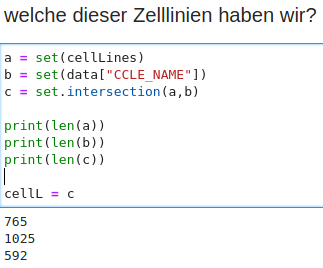

In [27]:
cellL = list(cellL)
len(cellL)

592

## Getting Mutational Signatures of the Celllines

In [29]:
def getMutationalSignature(Index):
    cols = data.columns.to_list()
    bits = data.iloc[Index][:].to_list()
    muts=[]

    for i in range(len(bits)):
        if bits[i] == 1:
            muts.append(cols[i])
    return muts

In [6]:
# takes a cell line name and returns a list of driver mutations

def getMutationalSignature2(cellLine):
    cols = data.columns.to_list()
    Index = data[data['CCLE_NAME'].str.match(cellLine)].index[0]
    bits = data.iloc[Index][:].to_list()
    muts=[]
    
    # could also return the abundance of this mutational status
    # in all the cells 
    
    for i in range(len(bits)):
        if bits[i] == 1:
            muts.append(cols[i])
    return muts

In [24]:
mydict = {}
for _ in cellL:
    mydict[_] = getMutationalSignature2(_)

In [120]:
#mydict

In [123]:
# THE 71 GENETIC BACKGROUNDS
#data.columns.to_list()

In [229]:
num = data[data['CCLE_NAME'].str.match('MOLM16')].index[0]

In [228]:
test1 = data[data['TP53_mut_del'] == 1] 
len(test1['CCLE_NAME'].to_list())

730

In [18]:
test1 = data[data['TP53_mut_del'] == 0] 
len(test1['CCLE_NAME'].to_list())

296

In [150]:
effect = np.transpose(effect)

In [151]:
effect = effect[cellL]

In [31]:
effect.head()

,KMS18,SKUT1,SCS214,BC3C,AML193,LU99,U87MG,HT29,SNU685,EWS502,...,TM31,SNU886,HCC1143,PSN1,SNU46,LS513,NCIH322,NCIH2122,OVTOKO,PANC1005
A1BG,0.095400,-0.036084,0.019714,-0.003011,0.108347,0.120687,0.149317,0.121370,0.150626,0.052768,...,0.092145,0.165552,0.263727,0.077583,0.257373,0.070026,0.017881,0.064054,0.374315,0.061629
A1CF,0.255913,0.036901,0.250870,0.056046,0.020884,0.276238,0.038916,0.117390,-0.152901,-0.049931,...,-0.031041,0.197775,-0.201341,0.150498,0.058643,0.075066,0.057025,0.168408,0.191044,0.121350
A2M,-0.165736,-0.015337,-0.075553,-0.119158,-0.081777,-0.189814,0.180609,-0.117615,-0.112918,-0.089148,...,0.072996,-0.075747,-0.063252,-0.361511,-0.177709,-0.064637,-0.092955,-0.117898,0.147322,-0.155068
A2ML1,0.166598,0.183908,0.288222,0.312940,0.045239,0.216861,0.236131,0.216060,0.259285,0.090852,...,0.194897,0.218513,0.166935,0.095877,0.168367,0.156905,0.146994,0.166248,0.095008,0.084474
A3GALT2,-0.019427,-0.262125,-0.116243,-0.070828,-0.118562,-0.286549,-0.155612,0.020586,-0.009486,-0.118563,...,-0.033135,0.156106,-0.023224,0.027152,-0.073757,0.099075,-0.052442,-0.193995,0.029721,-0.266106


In [38]:
effect.to_csv('effectCellL.csv')

In [96]:
effectCellL = pd.read_csv('effectCellL.csv')

In [100]:
effect[effect.index.str.startswith("MDM4")]

,KMS18,SKUT1,SCS214,BC3C,AML193,LU99,U87MG,HT29,SNU685,EWS502,...,TM31,SNU886,HCC1143,PSN1,SNU46,LS513,NCIH322,NCIH2122,OVTOKO,PANC1005
MDM4,-0.043693,-0.089976,-0.455868,-0.219348,0.141484,-0.747794,-0.301992,-0.05202,-0.040888,0.068544,...,-0.11586,-0.070743,-0.131455,-0.178272,-0.054482,-0.240261,-0.14052,-0.43382,-0.438912,0.092282


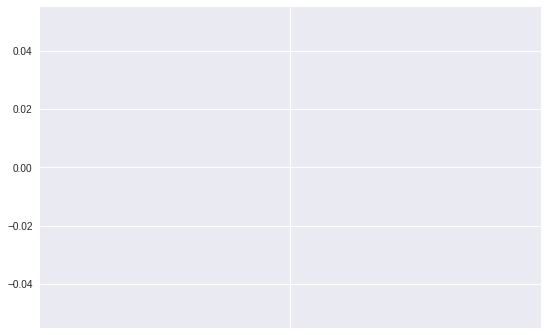

In [244]:
# make a function out of this template

list1 = data[data.TP53_mut_del == 1]["CCLE_NAME"].to_list()
mutation = set.intersection(set(list1),set(cellL))

list2 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()
noMutation = set.intersection(set(list2),set(cellL))

mdm4 = effect[effect.index.str.startswith("MDM4")]

mdm4Df2 = single_column(mdm4,mutation,'MUT')

mdm4Df1 = single_column(mdm4,noMutation,'WT')

mdm4Df = pd.concat([mdm4Df1,mdm4Df2], axis=1, sort=False)

mdm4Df.boxplot()

In [22]:
ulidata = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/TP53_MDM4.csv")
ulidata = ulidata['cellline'].to_list()

result = []

for _ in ulidata:
    result.append(mapping[_])
    
cellLine = result
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cell_L = []
for i in range(len(cellLine)):
    cell_L.append(cellLine[i][0])

In [25]:
list1 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()
#list1 = [j for i in list1 for j in i]
# split at space
for i in range(len(list1)):
    list1[i] = list1[i].split("_") 

List1 = []
for i in range(len(list1)):
    List1.append(list1[i][0])

In [306]:
overlap = set.intersection(set(List1),set(cell_L))

In [304]:
len(overlap)

17

In [307]:
len(overlap)

81

In [308]:
17/134

0.12686567164179105

In [309]:
81/134

0.6044776119402985

In [161]:
#from scipy.stats import pearsonr,ttest_ind

ttest_ind(mdm4Df.WT.to_list(),mdm4Df.MUT.to_list(),nan_policy='omit')

Ttest_indResult(statistic=-14.060976989914527, pvalue=5.6784256007003574e-39)

In [92]:
def compare_groups(mutation,kogene):
    list1 = data[data[mutation] == 1]["CCLE_NAME"].to_list()
    mutation = set.intersection(set(list1),set(cellL))

    list2 = data[data[mutation] == 0]["CCLE_NAME"].to_list()
    noMutation = set.intersection(set(list2),set(cellL))

    ko_gene = effectCellL[effectCellL.index.str.startswith(kogene)]

    Df2 = single_column(ko_gene,mutation,'MUT')

    Df1 = single_column(ko_gene,noMutation,'WT')

    Df = pd.concat([Df1,Df2], axis=1, sort=False)
    Df.boxplot()

In [94]:
#compare_groups('CIC_mut_del',mdm4)

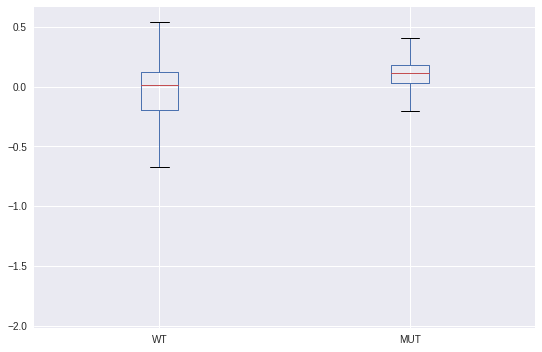

In [118]:
list1 = data[data.BRAF_mut == 1]["CCLE_NAME"].to_list()
mutation = set.intersection(set(list1),set(cellL))

list2 = data[data.BRAF_mut == 0]["CCLE_NAME"].to_list()
noMutation = set.intersection(set(list2),set(cellL))

braf1 = effect[effect.index.str.startswith("RAF1")]

braf1Df2 = single_column(braf1,mutation,'MUT')

braf1Df1 = single_column(braf1,noMutation,'WT')

brafDf = pd.concat([braf1Df1,braf1Df2], axis=1, sort=False)
brafDf.boxplot()

In [133]:
"""list1 = data[data.TP53_mut_del == 1]["CCLE_NAME"].to_list()
mutation = set.intersection(set(list1),set(cellL))

list2 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()
noMutation = set.intersection(set(list2),set(cellL))

mdm2 = effect[effect.index.str.startswith("MDM2")]

mdm2Df2 = single_column(mdm2,mutation,'MUT')

mdm2Df1 = single_column(mdm2,noMutation,'WT')

mdm2Df = pd.concat([mdm2Df1,mdm2Df2], axis=1, sort=False)
mdm2Df.boxplot()

plt.title('MDM2 Resistance in TP53 deletion cell Lines')
plt.ylabel('MDM2 Sensitivity')
plt.xlabel("TP53")
plt.savefig('mdm2_resistance.png')"""

'list1 = data[data.TP53_mut_del == 1]["CCLE_NAME"].to_list()\nmutation = set.intersection(set(list1),set(cellL))\n\nlist2 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()\nnoMutation = set.intersection(set(list2),set(cellL))\n\nmdm2 = effect[effect.index.str.startswith("MDM2")]\n\nmdm2Df2 = single_column(mdm2,mutation,\'MUT\')\n\nmdm2Df1 = single_column(mdm2,noMutation,\'WT\')\n\nmdm2Df = pd.concat([mdm2Df1,mdm2Df2], axis=1, sort=False)\nmdm2Df.boxplot()\n\nplt.title(\'MDM2 Resistance in TP53 deletion cell Lines\')\nplt.ylabel(\'MDM2 Sensitivity\')\nplt.xlabel("TP53")\nplt.savefig(\'mdm2_resistance.png\')'

In [113]:
# model from colm
#‘gene_X_sensitivity ~MSI_status + C(Tissue) + driver_gene_Y_status

Statistical Modelling, ANOVAs

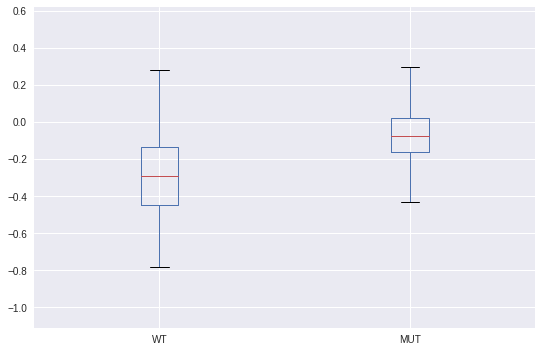

In [116]:
list1 = data[data.BRAF_mut == 1]["CCLE_NAME"].to_list()
mutation = set.intersection(set(list1),set(cellL))

list2 = data[data.BRAF_mut == 0]["CCLE_NAME"].to_list()
noMutation = set.intersection(set(list2),set(cellL))

braf1 = effect[effect.index.str.startswith("MAPK")]

braf1Df2 = single_column(mdm4,mutation,'MUT')

braf1Df1 = single_column(mdm4,noMutation,'WT')

brafDf = pd.concat([mdm4Df1,mdm4Df2], axis=1, sort=False)
brafDf.boxplot()

Statsmodels Code for linear model with MSI_status

In [126]:
'''
import statsmodels.api as sm
from statsmodels.formula.api import ols 
data = brafDf
moore_lm = ols('gene_X_sensitivity ~MSI_status + C(Tissue) + driver_gene_Y_status'',
                data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)
'''

"\nimport statsmodels.api as sm\n\nfrom statsmodels.formula.api import ols \n\ndata = brafDf\n\nmoore_lm = ols('gene_X_sensitivity ~MSI_status + C(Tissue) + driver_gene_Y_status'',\n                data=data).fit()\n\ntable = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame\n\nprint(table)\n"

### Adopt the naming convention of Ryan

In [81]:
def single_column(df,columns,nameOfNewCol):
    'takes list of columns and returns a Df of values'
    vals = df[columns].values.tolist()
    valsList = [j for x in vals for j in x]
    valsDf = pd.DataFrame(valsList,columns = [nameOfNewCol])
    return valsDf

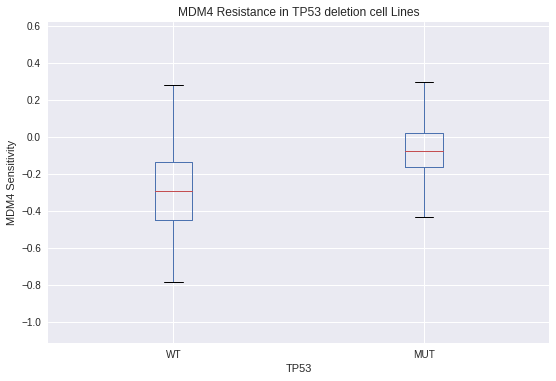

In [115]:
plt.style.use('seaborn')
mdm4Df = pd.concat([mdm4Df1,mdm4Df2], axis=1, sort=False)
mdm4Df.boxplot()
plt.title('MDM4 Resistance in TP53 deletion cell Lines')
plt.ylabel('MDM4 Sensitivity')
plt.xlabel("TP53")
plt.savefig('mdm4_resistance.png')

In [ ]:
mdm4Df = pd.concat([mdm4Df1,mdm4Df2], axis=1, sort=False)
mdm4Df.boxplot()

we have all MDM4 values, now separate into those that are 
tp53 deletions and those that are WT.

how to use my function to get all the ones with a specific mutation.

In [259]:
df = pd.DataFrame(np.random.rand(30))

In [334]:
list1 = data[data.TP53_mut_del == 1]["CCLE_NAME"].to_list()
len(list1) + len(list2)

1026

In [333]:
list2 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()
len(list2)

296

TODO: get only the intersecting cell from the gene-effect dataset
    then get from the ryan dataset all the tp53 del mutants (done),
    then get those columns from the gene-effect dataset. all the
    others form the rest. now get eg the MDM4 gene-effect for both
    groups. now compare them.